# Preprocessing for Full Model 

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

%matplotlib inline

## Training Setup

### Load features data frame

In [2]:
# Path to pickle of training features pandas dataframe
baseBufferPklFile = 'DataFrames/FullTestFeatsDF.pkl'

In [3]:
# load baseBufferPkl
df = pd.read_pickle(baseBufferPklFile)

# create a label column with 'unlabbled' label
df = df.assign(Label=-1)

# create a predicted label column with 'unlabelled' label
df = df.assign(predictLabel=-1)

print(df.shape)

(116483, 411)


In [4]:
print(df.describe())
print(df.columns.values)

                Beam         BestDM          Block          DMmax  \
count  116483.000000  116483.000000  116483.000000  116483.000000   
mean        3.575208      39.505696     237.660672      55.679184   
std         2.443995      75.217719     312.572519      98.930153   
min         1.000000       0.100000       1.000000       0.100000   
25%         1.000000       3.100000      61.000000       3.800000   
50%         3.000000       7.000000     107.000000       8.800000   
75%         6.000000      33.000000     239.000000      53.799999   
max         8.000000     621.600037    1645.000000     639.799988   

              DMmean       DMmedian          DMmin        DMrange  \
count  116483.000000  116483.000000  116483.000000  116483.000000   
mean       40.915203      41.134676      27.026719      28.652465   
std        74.902566      76.275573      58.444974      72.331657   
min         0.100000       0.100000       0.000000       0.000000   
25%         3.158065       3.1000

621


(0, 15)

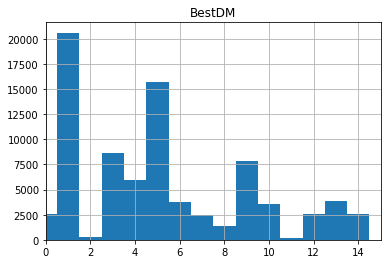

In [11]:
binNum = int(df['BestDM'].max())
print(binNum)
df.hist('BestDM', bins=np.arange(-0.5,15.5,1))
plt.xlim(0,15)

#### Compute MJD Features

We don't care about the absolute MJDs, but the relative offset within the dataset.

In [5]:
df['relMJDmax'] = df['MJDmax'] - df['MJDmin']
df['relMJDmean'] = df['MJDmean'] - df['MJDmin']
df['relMJDmedian'] = df['MJDmedian'] - df['MJDmin']

#### Sanity check
Make sure the features don't have extreme values

In [6]:
for col in df:
    if df[col].dtype == object: print(col, df[col].min(), df[col].max())
    else: print(col, df[col].min(), df[col].max(), df[col].std())

Beam 1 8 2.443994835046212
BestDM 0.10000000149012 621.60003662109 75.21771851061088
Block 1 1645 312.5725194500511
DMmax 0.10000000149011999 639.79998779297 98.93015292805207
DMmean 0.10000000149011999 598.5394734438222 74.90256632378568
DMmedian 0.10000000149011999 621.40002441406 76.27557282341719
DMmin 0.0 318.5 58.44497418581846
DMrange 0.0 639.79998779297 72.33165657900717
DMstd 0.0 155.91680512627346 17.4553116916016
DMstdMaxratio 0.0 0.554716065601245 0.0705082336613033
Events 4 1590895 28321.259480170174
GaussianTestsksD 0.004935077002021115 0.5400019184239966 0.18913518390268716
GaussianTestskspvalue 0.0 0.999999829105757 0.2948194470125225
GaussianTestskurtosis -1.977753184911155 24408.973293834468 1114.0533891183918
GaussianTestsskew -156.24008178710938 78.43228149414062 15.087640718731311
MJDStart 16767.552794199 58201.989421902996 2235.388091545786
MJDmax 16767.552856398 58201.989463166 2235.388092464976
MJDmean 16767.55285387722 58201.98946298632 2235.3880932102575
MJDme

pixelsmean_14_0 -4422.236328125 5105.3408203125 169.2281778843088
pixelsmean_14_1 -30658.203125 214.71896362304688 1006.6616457881618
pixelsmean_14_2 -4426.7607421875 11015.5166015625 362.1878424594332
pixelsmean_14_3 -4427.24560546875 11890.49609375 391.39305462409266
pixelsmean_15_0 -993.1898803710938 5105.3408203125 168.77867332686873
pixelsmean_15_1 -30658.203125 214.82766723632812 1006.0712575051904
pixelsmean_15_2 -1000.2958984375 11015.5166015625 361.77547662100073
pixelsmean_15_3 -1001.57861328125 11890.49609375 390.98162517807214
pixelsmean_1_0 -9289.1728515625 637.9533081054688 314.1918102432509
pixelsmean_1_1 -43240.1328125 219.09349060058594 1432.7689641369177
pixelsmean_1_2 -8701.25390625 194.1690216064453 202.6872785034879
pixelsmean_1_3 -8672.798828125 190.11279296875 204.00974106092684
pixelsmean_2_0 -22596.634765625 636.4417114257812 804.5343608699549
pixelsmean_2_1 -43077.8984375 218.44407653808594 1608.0300100609688
pixelsmean_2_2 -22596.634765625 193.25689697265625 

windDedispTimeSeriesmean5 -2160397.75 4334521.0 54474.17617123286
windDedispTimeSeriesmean6 -2224752.75 4084499.25 55114.25866527556
windDedispTimeSeriesmean7 -878266.125 4273327.0 42758.29584527592
windDedispTimeSeriesmean8 -219201.75 4479933.5 42129.149834337426
windDedispTimeSeriesmean9 -1034008.3125 4298478.5 40458.34157369573
windDedispTimeSeriesmin0 -3198376.0 4349.87939453125 123861.44818878305
windDedispTimeSeriesmin1 -3194348.75 401403.84375 124839.26525412676
windDedispTimeSeriesmin10 -6595289.0 6001.548828125 61651.39632832042
windDedispTimeSeriesmin11 -12496681.0 4951.26220703125 116313.95340011363
windDedispTimeSeriesmin12 -14268784.0 3762.775634765625 132843.9507783652
windDedispTimeSeriesmin13 -10421544.0 3245.01025390625 99421.2880755268
windDedispTimeSeriesmin14 -13606482.0 5246.5283203125 41058.8449550737
windDedispTimeSeriesmin15 -20003152.0 3060.097900390625 59112.03017555255
windDedispTimeSeriesmin2 -3198484.75 1945163.375 120381.65648057182
windDedispTimeSeriesmin

#### Drop features that are not useful

In [8]:
df = df.drop(['Block','Label', 'predictLabel'], axis=1)

## Pre-processing

Prepare the features for model building: outliers (inf, NaN) are replaced, the features are scaled to approximately zero mean, and unity variance.

In [9]:
import sklearn.preprocessing

Convert feature data frame to 2D array of floats

In [10]:
featuresArr = df.values.astype('float32')
featureNames = list(df.columns.values)

In [11]:
featuresArr[featuresArr == -1. * np.inf] = np.nan
featuresArr[featuresArr == np.inf] = np.nan
print('NaN values in feature array:', featuresArr[featuresArr == np.nan])

imp = sklearn.preprocessing.Imputer(strategy='mean').fit(featuresArr)

preProcFeats = imp.transform(featuresArr)

NaN values in feature array: []


### Scale Features

Robust scaling uses a median filter, this is better for non-Gaussian distributions

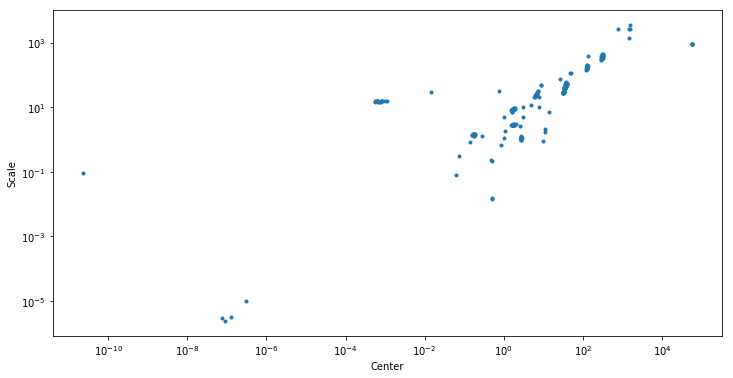

In [12]:
rScale = sklearn.preprocessing.RobustScaler().fit(preProcFeats)

plt.figure(figsize=(12, 6))
plt.loglog(rScale.center_, rScale.scale_, '.')
#plt.plot(rScale.center_, rScale.scale_, '.')
#for fnid, fName in enumerate(featureNames): plt.text(rScale.center_[fnid], rScale.scale_[fnid], fName)
plt.xlabel('Center')
plt.ylabel('Scale')

preProcFeats = rScale.transform(preProcFeats)

## Save the Features and labels arrays

#### Save Features array

In [13]:
np.save('Arrays/TestFeatsArray.npy',preProcFeats)
np.save('Arrays/TestFeatureNames.npy', featureNames)

In [14]:
x = np.load('Arrays/TestFeatsArray.npy')

In [15]:
print(x.shape)

(116483, 411)
